# Project: Investigate a Dataset (Wine Quality Dataset on Kaggle)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, different techniques were used on a wine dataset, to class and predict a wine preference and quality based on the physicochemical data. The dataset used is related to Vinho Verde wine samples, from the north of Portugal. The wine dataset was used in this project, which contains 1143 instances with 13 attributes features of physicochemical data such as volatile acidity, residual sugar, sulphates, pH, and density. In this project, three classification techniques are implemented: Support Vector Machine, Logistic Regression, k-Nearest Neighbors (kNN) algorithms were used. Their performance was obtained, evaluated, compared, and discussed based on their scores and findings.

In [1]:
#Importing all the libraries.
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error
from pprint import pprint
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import model_selection

from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
#Loading the wine dataset
df = pd.read_csv('/home/axe_rhitta/WineQT.csv')

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, I converted the dataset into a frame for easy manipulation and analyzing and to understand the dataset. The dataset was looked at to see how the data was structured and distributed (data type, feature names & columns and dimensions) and ensure they were no missing values or columns so at to get accurate results.

### General Properties

In [3]:
# Understanding the data
print("Rows, columns: " + str(df.shape))

Rows, columns: (1143, 13)


In [4]:
print(df.head(10))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            6.7              0.58         0.08             1.8      0.097   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

In [5]:
#Checking how the data is distributed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
#Checking for missing values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [7]:
#Describing method that shows basic statistical characteristics of ech numerical feature.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [8]:
#Getting mean of all column with highest mark
print(df[df['quality']== 8].mean())

fixed acidity             8.806250
volatile acidity          0.410000
citric acid               0.432500
residual sugar            2.643750
chlorides                 0.070187
free sulfur dioxide      11.062500
total sulfur dioxide     29.375000
density                   0.995553
pH                        3.240625
sulphates                 0.766250
alcohol                  11.937500
quality                   8.000000
Id                      797.875000
dtype: float64


In [9]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
quality,,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667,1121.166667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606,692.848485
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277,753.925466
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339,854.625541
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634,830.349650
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500,797.875000


In [10]:
sorted_df = df.sort_values(by='quality', ascending=False)
sorted_df.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
197,10.3,0.320,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8,278
349,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,495
1030,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8,1449
190,7.9,0.350,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8,267
1104,7.4,0.360,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.4,8,1549
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,7.2,0.250,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80,12.4,7,1192
236,7.9,0.650,0.01,2.5,0.078,17.0,38.0,0.99630,3.34,0.74,11.7,7,334
237,11.9,0.695,0.53,3.4,0.128,7.0,21.0,0.99920,3.17,0.84,12.2,7,335
240,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7,339


<a id='eda'></a>
## Exploratory Data Analysis

>  In this section, I compute statistics and create visualizations with the goal of addressing the research questions that was posed in the Introduction section. I Look at one variable at a time, and then follow it up by looking at relationships between variables. There were different types of visualization looked at.

### Data Visualization

In [11]:
#Corrrelation Matrix
corr_matrix = df.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

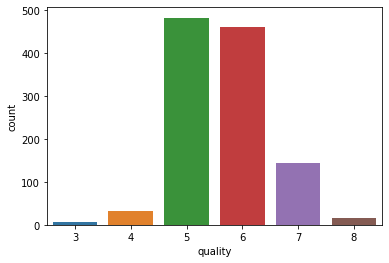

In [12]:
#Countplot of quality
sns.countplot(df['quality'])
plt.show()

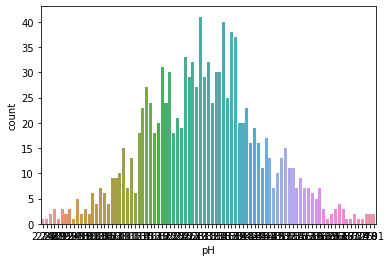

In [13]:
#Countplot of pH
sns.countplot(df['pH'])
plt.show()

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

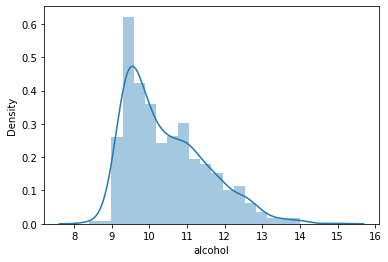

In [14]:
#Distplot
sns.distplot(df['alcohol'])

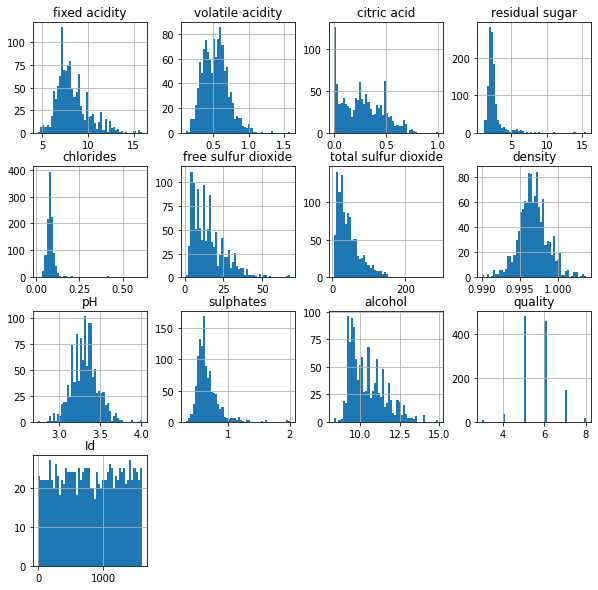

In [15]:
#Histogram
df.hist(figsize=(10,10),bins=50)
plt.show()

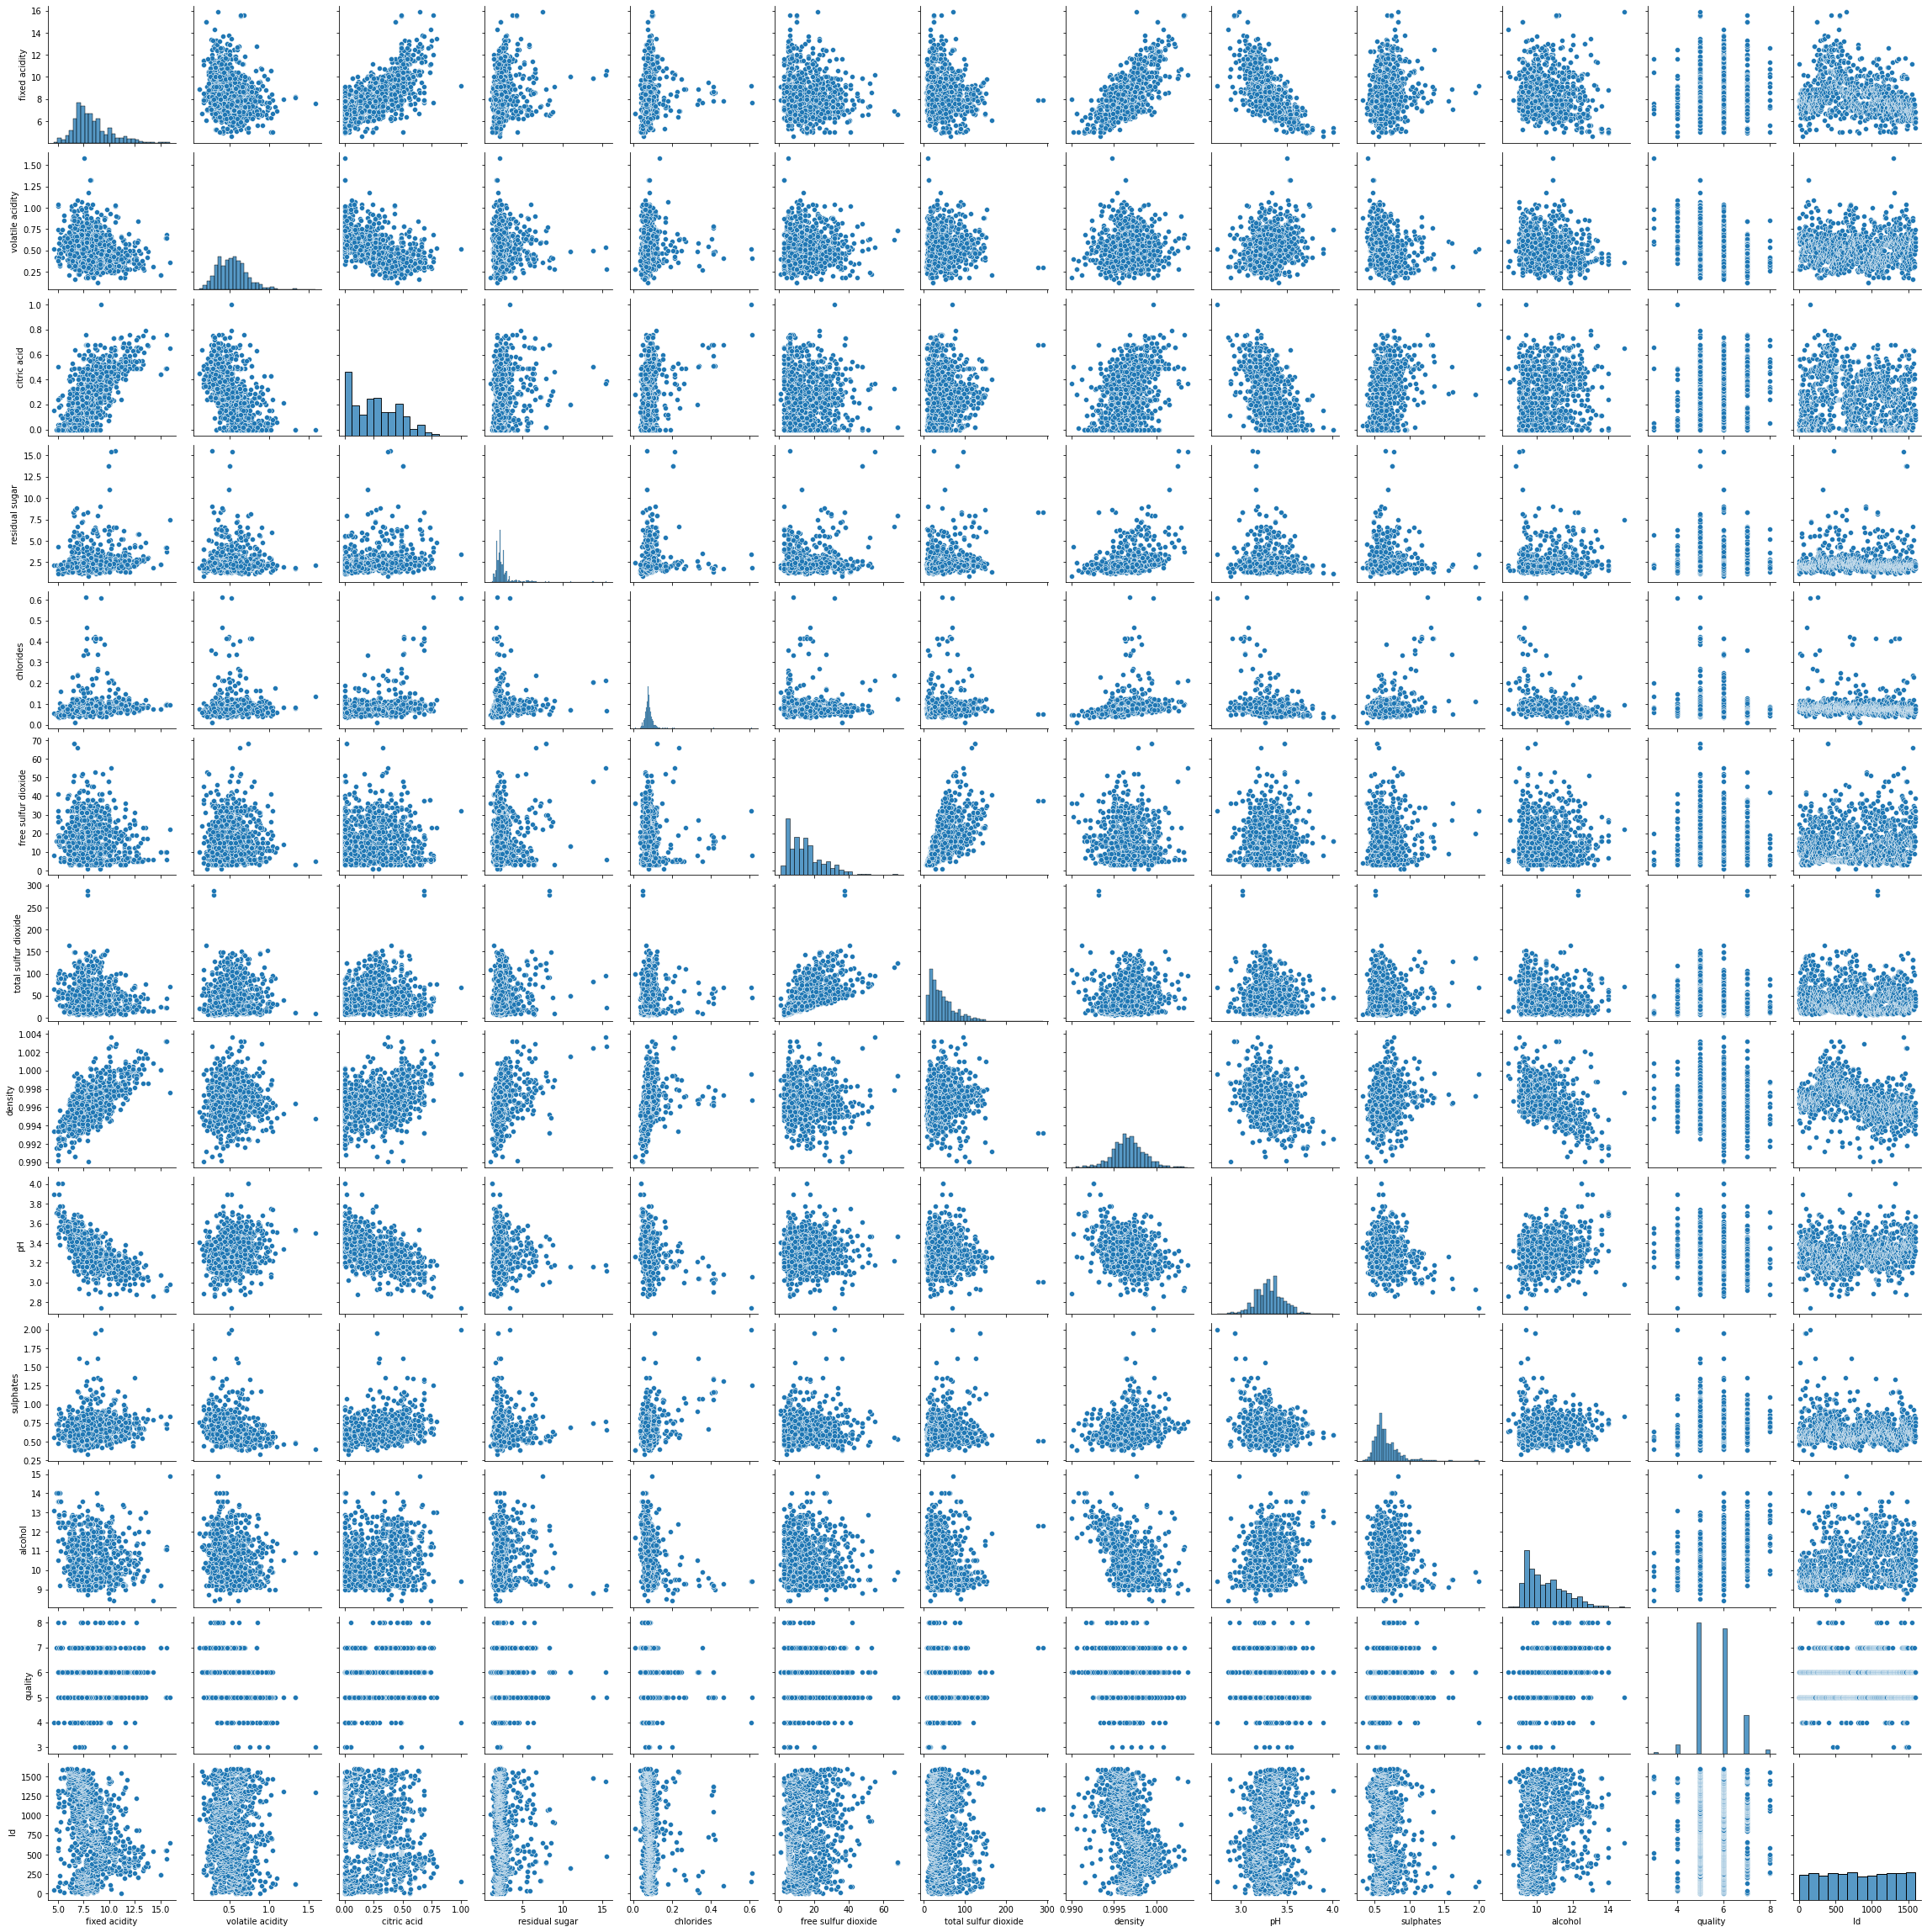

In [16]:
#Pairplot
sns.pairplot(df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

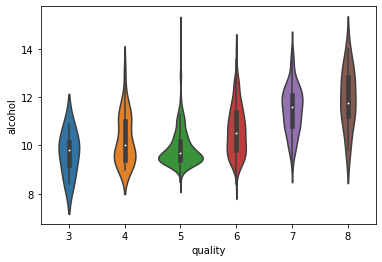

In [17]:
#Violinplot
sns.violinplot(x='quality', y='alcohol', data=df)

No handles with labels found to put in legend.


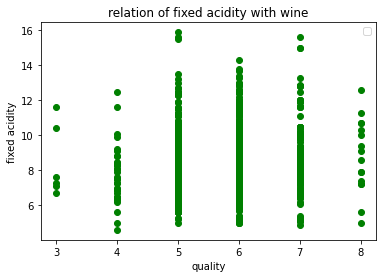

In [18]:
#Checking the variation of fixed acidity in the different qualities of wine
plt.scatter(df['quality'], df['fixed acidity'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

No handles with labels found to put in legend.


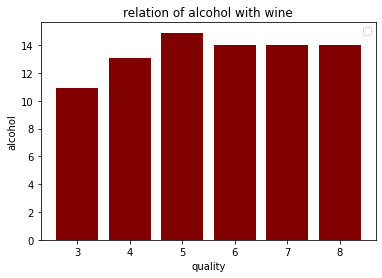

In [19]:
# Checking the variation of fixed acidity in the different qualities of wine
plt.bar(df['quality'], df['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

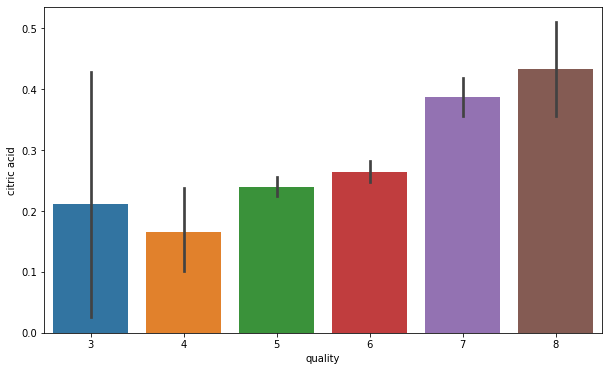

In [20]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

### Feature Selection

In [21]:
#Dividing wine as good and bad by giving limit to the quality
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
Y = df['goodquality']

In [22]:
#Checking of good vs bad wines
df['goodquality'].value_counts()

0    984
1    159
Name: goodquality, dtype: int64

In [23]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1595


In [24]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: goodquality, Length: 1143, dtype: int64


### Feature Importance

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.06709573 0.09925963 0.10206803 0.06970576 0.06189642 0.06040459
 0.07260037 0.08208444 0.05985908 0.09997005 0.15532345 0.06973246]


In [26]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

### Applying ML Algorithms

In [27]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.8833819241982507


In [28]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.8017492711370262


In [29]:
#Support Vector Machine
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,pred_y))

Accuracy Score: 0.8688046647230321


In [30]:
#Xgboost
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

[18:58:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.8950437317784257


In [31]:
#Confusion Matrix
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[289   9]
 [ 31  14]]


In [32]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Xgboost'],
    'Score': [0.883, 0.801,0.869,0.895]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.895,Xgboost
0.883,Logistic Regression
0.869,SVC
0.801,KNN


<a id='conclusions'></a>
## Conclusions
> After looking at the details of feature importance of the algorithms we could see that tunning features like pH, alcohol and alcohol makes wine scores lower or higher. It showed that having lower volatile acidity on average, high levels of alcohol, sulphates and residual sugar on average makes good quality wines. So getting good quality could happen by properly fine tuning the physicochemical properties. This shows that some inputs are very essential in making good wines could also influence human preference for wines.

> In conclusion, based on the experiment steps and result, Logistic regression and Xgboost algorithm gave and proves to be best and accurate classifier in predicting wine preferences, this was evident in both the training and testing process. The predicted values can be used for producing new and different types of wine based on preference or could further be perfected using different parameters for the learning process.